In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def price_buckets(frame, std_half = False):
    frame['daily_avg'] = (frame['Open'] + frame['Close']) / 2
    frame['daily_avg'] = frame['daily_avg'].apply(np.floor)
    start = int(frame['daily_avg'].min())
    end = int(frame['daily_avg'].max())

    window = 0

    if std_half:
        window = int(np.floor(frame['daily_avg'].std() / 2))
    else:
        window = int(np.floor(frame['daily_avg'].std()))

    print(frame['daily_avg'].value_counts(bins=range(start, end, window), sort=False))


In [6]:
def insights(file, half_sd = False):
    stock = pd.read_csv(file, index_col="Date", parse_dates=True)
    stock['move'] = stock['Close'] - stock['Open']
    print("Price buckets")
    price_buckets(stock, half_sd)
    mean = stock["daily_avg"].mean()
    sd = stock["daily_avg"].std()
    stock['VolumeM'] = stock['Volume'] / 1000000
    price_range = (mean - sd, mean + sd)
    print(f"{mean=}, {sd=}, {price_range=}")
    print("Price movement")
    stock['move'].hist()
    return stock

Price buckets
(2497.999, 3030.0]    127
(3030.0, 3562.0]       82
(3562.0, 4094.0]       20
(4094.0, 4626.0]        5
Name: daily_avg, dtype: int64
mean=3194.3024193548385, sd=532.5697700716058, price_range=(2661.7326492832326, 3726.8721894264445)
Price movement


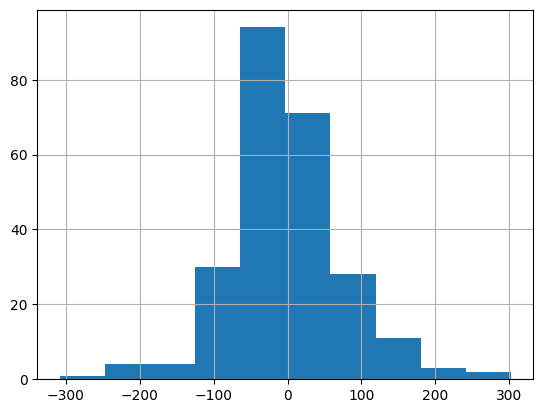

In [7]:
df = insights("/Users/deepakkumar/Downloads/TVSSRICHAK.NS.csv", half_sd=False)

In [5]:
xs = np.arange(248)
ys = df["Close"] / df["Open"]

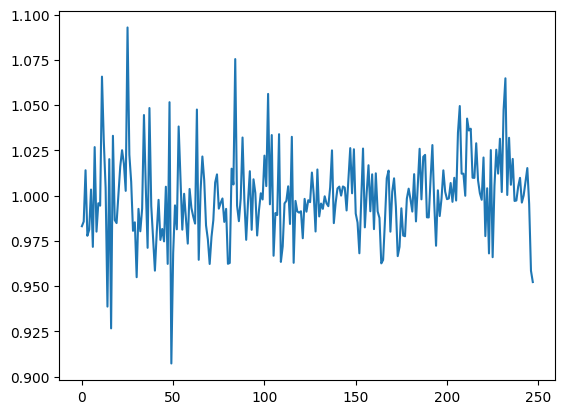

In [6]:
plt.plot(xs, ys)

Price buckets
(143.999, 174.0]    65
(174.0, 204.0]      70
(204.0, 234.0]       7
(234.0, 264.0]      22
(264.0, 294.0]      36
(294.0, 324.0]      13
Name: daily_avg, dtype: int64
mean=220.33476394849785, sd=61.65042887998656, price_range=(158.6843350685113, 281.9851928284844)
Price movement


,Open,High,Low,Close,Adj Close,Volume,move,daily_avg,VolumeM
Date,,,,,,,,,
2022-12-01,200.050003,201.149994,197.100006,199.449997,197.868942,149059.0,-0.600006,199.0,0.149059
2022-12-02,198.699997,207.050003,196.350006,203.050003,201.440414,229204.0,4.350006,200.0,0.229204
2022-12-05,206.000000,209.000000,203.149994,204.100006,202.482086,272211.0,-1.899994,205.0,0.272211
2022-12-06,204.100006,209.000000,200.800003,207.350006,205.706329,304094.0,3.250000,205.0,0.304094
2022-12-07,207.949997,208.600006,202.250000,206.100006,204.466232,92935.0,-1.849991,207.0,0.092935
...,...,...,...,...,...,...,...,...,...
2023-11-24,335.100006,342.000000,335.100006,340.100006,340.100006,71933.0,5.000000,337.0,0.071933
2023-11-28,344.950012,346.750000,339.299988,341.350006,341.350006,96649.0,-3.600006,343.0,0.096649
2023-11-29,340.049988,356.000000,340.049988,345.000000,345.000000,81679.0,4.950012,342.0,0.081679


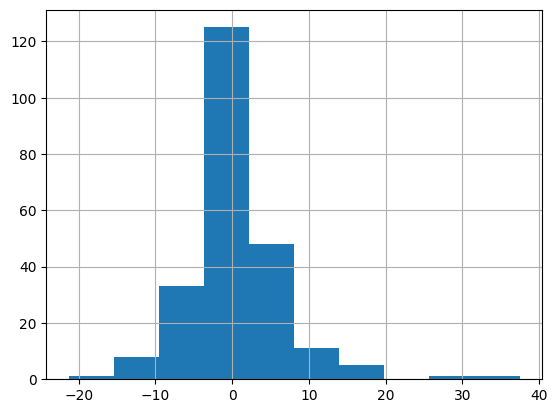

In [7]:
insights("/Users/deepakkumar/Downloads/JKTYRE.BO.csv", half_sd=True)

Price buckets
(342.999, 378.0]     64
(378.0, 413.0]       51
(413.0, 448.0]      113
(448.0, 483.0]        7
Name: daily_avg, dtype: int64
mean=410.0806451612903, sd=35.45404661592848, price_range=(374.62659854536184, 445.53469177721877)
Price movement


,Open,High,Low,Close,Adj Close,Volume,move,daily_avg,VolumeM
Date,,,,,,,,,
2022-12-01,444.200012,448.399994,438.000000,441.500000,441.500000,329319,-2.700012,442.0,0.329319
2022-12-02,443.000000,445.450012,437.500000,439.299988,439.299988,368050,-3.700012,441.0,0.368050
2022-12-05,441.600006,444.899994,436.500000,438.850006,438.850006,892098,-2.750000,440.0,0.892098
2022-12-06,439.899994,455.500000,432.100006,449.149994,449.149994,1372186,9.250000,444.0,1.372186
2022-12-07,450.000000,457.000000,438.649994,454.799988,454.799988,1426891,4.799988,452.0,1.426891
...,...,...,...,...,...,...,...,...,...
2023-11-24,499.450012,504.899994,491.549988,493.850006,493.850006,414126,-5.600006,496.0,0.414126
2023-11-28,494.000000,504.899994,489.799988,493.899994,493.899994,361023,-0.100006,493.0,0.361023
2023-11-29,497.750000,505.950012,488.950012,500.049988,500.049988,547401,2.299988,498.0,0.547401


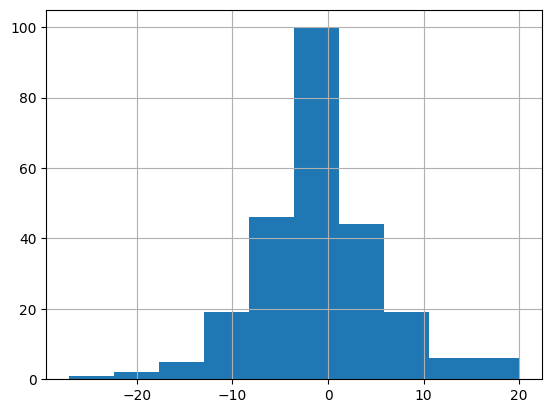

In [8]:
insights("/Users/deepakkumar/Downloads/QUESS.NS.csv")

Price buckets
(2497.999, 3030.0]    127
(3030.0, 3562.0]       82
(3562.0, 4094.0]       20
(4094.0, 4626.0]        5
Name: daily_avg, dtype: int64
mean=3194.3024193548385, sd=532.5697700716058, price_range=(2661.7326492832326, 3726.8721894264445)
Price movement


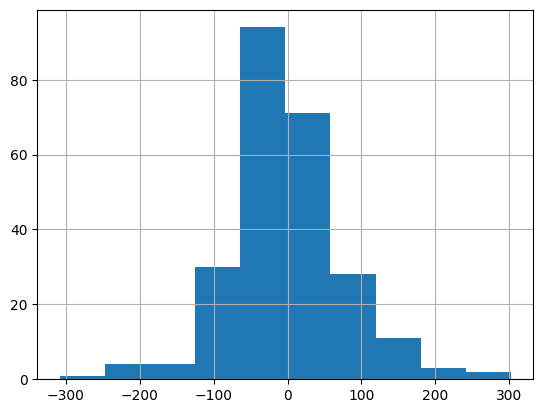

In [16]:
df = insights("/Users/deepakkumar/Downloads/TVSSRICHAK.NS.csv")

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,move,daily_avg,VolumeM
count,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000
mean,18737.780563,18930.398980,18552.243453,18742.953884,18742.953884,1.170783e+06,5.173322,18739.888889,1.170783
std,942.907325,931.954180,980.204897,973.409044,973.409044,3.320250e+05,250.733439,950.088470,0.332025
min,16984.300781,17207.250000,16828.349609,16945.050781,16945.050781,0.000000e+00,-514.099610,17005.000000,0.000000
25%,17955.800781,18151.987793,17730.225098,17880.636719,17880.636719,1.018225e+06,-145.386718,17914.250000,1.018225
50%,18650.750000,18821.299805,18545.674804,18614.450196,18614.450196,1.160300e+06,17.574218,18659.000000,1.160300
75%,19535.849610,19743.925293,19392.962402,19559.037598,19559.037598,1.336775e+06,189.124511,19604.500000,1.336775
max,20808.900391,20849.599609,20711.150391,20779.949219,20779.949219,2.257800e+06,506.701172,20794.000000,2.257800
